In [ ]:
%matplotlib --list

In [ ]:
from datetime import datetime
from sklearn.manifold import TSNE
import gensim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib widget

In [ ]:
# model = gensim.models.word2vec.Word2Vec.load('/home/jfrez/AI2/TextGAN-PyTorch/corpusgood_sinrepeticiones.w2v')
model = gensim.models.word2vec.Word2Vec.load('/home/jfrez/AI2/TextGAN-PyTorch/huracanes_sinrepeticiones.w2v')

# Option 1

In [ ]:
words_model = []
embeddings_model = []

for word in list(model.wv.index_to_key):
    embeddings_model.append(model.wv[word])
    words_model.append(word)

In [ ]:
tsne_model_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=250, random_state=32)
embeddings_model_2d = tsne_model_2d.fit_transform(embeddings_model)

In [ ]:
def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("tsne-images/{}.png".format(datetime.now().strftime("%Y%m%d_%H%M")), format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [ ]:
tsne_plot_2d('W2V t-SNE', embeddings_model_2d, words_model, 0.1)
# tsne_plot_2d('W2V Plot', embeddings_model_2d, 0.1)

# Option 2

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3000, random_state=32)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.savefig("tsne-images/{}.png".format(datetime.now().strftime("%Y%m%d_%H%M")), format='png', dpi=150, bbox_inches='tight')
    plt.show()

In [ ]:
tsne_plot(model)

# Option 3

In [ ]:
!jupyter nbextension install --user --py widgetsnbextension

In [ ]:
!jupyter nbextension enable widgetsnbextension --user --py

In [ ]:
import seaborn as sns
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.text import Annotation
%matplotlib widget

In [ ]:
model = gensim.models.word2vec.Word2Vec.load('/home/jfrez/AI2/TextGAN-PyTorch/corpusgood_sinrepeticiones.w2v')
# model = gensim.models.word2vec.Word2Vec.load('/home/jfrez/AI2/TextGAN-PyTorch/huracanes_sinrepeticiones.w2v')

In [ ]:
labels = []
tokens = []

for word in model.wv.index_to_key:
    tokens.append(model.wv[word])
    labels.append(word)

In [43]:
tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=32)
new_values = tsne_model.fit_transform(tokens)

/home/jfrez/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/jfrez/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [44]:
# set the default style
sns.set()

# define two colors, just to enrich the example
labels_color_map = {}
for index, value in enumerate(sns.color_palette().as_hex()):
    labels_color_map[index] = value

In [45]:
instances_colors = []
axis_values_x = []
axis_values_y = []
for index, value in enumerate(new_values):
    # print instance, index, labels[index]
    color = labels_color_map[index % 10]
    instances_colors.append(color)
    axis_values_x.append(value[0])
    axis_values_y.append(value[1])

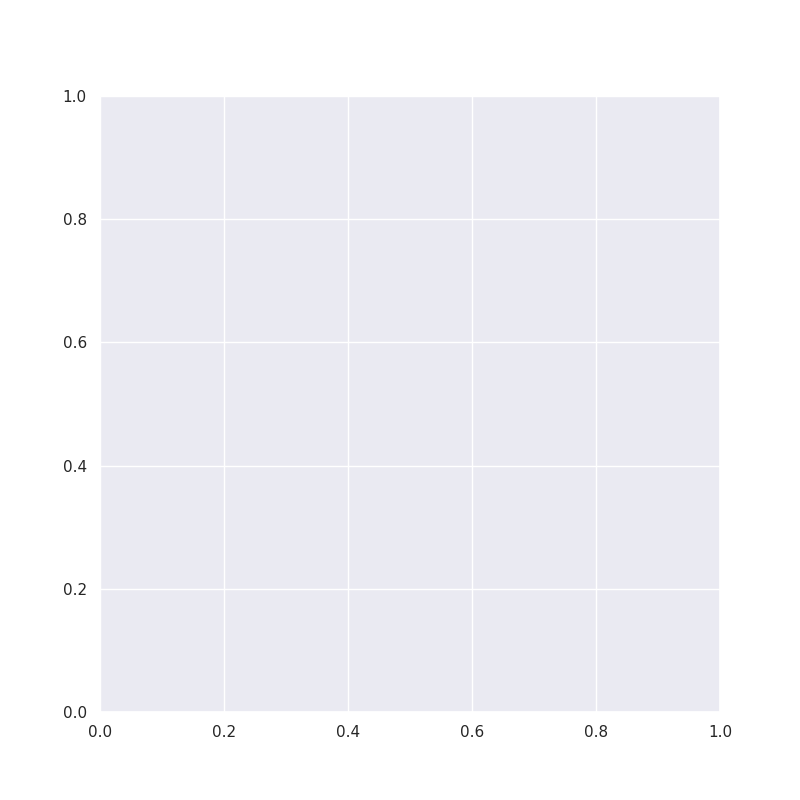

In [46]:
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot()

In [47]:
# extract the scatterplot drawing in a separate function so we ca re-use the code
def draw_scatterplot():
    ax.scatter(
        axis_values_x,
        axis_values_y,
        c=instances_colors,
        picker=True
    )

In [48]:
# draw the initial scatterplot
draw_scatterplot()

In [49]:
# create and add an annotation object (a text label)
def annotate(axis, text, x, y):
    text_annotation = Annotation(text, xy=(x, y), xycoords='data')
    axis.add_artist(text_annotation)

In [50]:
# define the behaviour -> what happens when you pick a dot on the scatterplot by clicking close to it
def onpick(event):
    # step 1: take the index of the dot which was picked
    ind = event.ind

    # step 2: save the actual coordinates of the click, so we can position the text label properly
    label_pos_x = event.mouseevent.xdata
    label_pos_y = event.mouseevent.ydata

    # just in case two dots are very close, this offset will help the labels not appear one on top of each other
    offset = 0

    # if the dots are to close one to another, a list of dots clicked is returned by the matplotlib library
    for i in ind:
        # step 3: take the label for the corresponding instance of the data
        label = labels[i]

        # step 4: log it for debugging purposes
        print("index", i, label)

        # step 5: create and add the text annotation to the scatterplot
        annotate(
            ax,
            label,
            label_pos_x + offset,
            label_pos_y + offset
        )

        # step 6: force re-draw
        ax.figure.canvas.draw_idle()

        # alter the offset just in case there are more than one dots affected by the click
        offset += 0.01

In [51]:
# connect the click handler function to the scatterplot
fig.canvas.mpl_connect('pick_event', onpick)

12

In [52]:
# create the "clear all" button, and place it somewhere on the screen
ax_clear_all = plt.axes([0.0, 0.0, 0.1, 0.05])
button_clear_all = Button(ax_clear_all, 'Clear all')

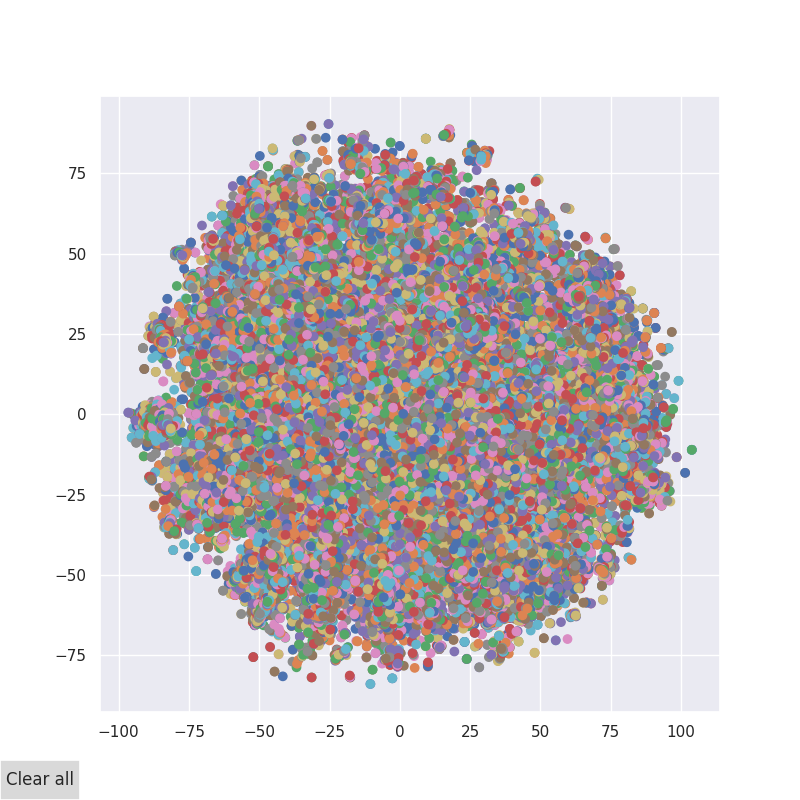

In [53]:
# define the "clear all" behaviour
def onclick(event):
    # step 1: we clear all artist object of the scatter plot
    ax.cla()

    # step 2: we re-populate the scatterplot only with the dots not the labels
    draw_scatterplot()

    # step 3: we force re-draw
    ax.figure.canvas.draw_idle()


# link the event handler function to the click event on the button
button_clear_all.on_clicked(onclick)

# initial drawing of the scatterplot
# plt.plot()
# print("scatterplot done")

# present the scatterplot
# plt.savefig("tsne-images/{}.png".format(datetime.now().strftime("%Y%m%d_%H%M")), format='png', dpi=150, bbox_inches='tight')
plt.show()

# Option 4 (Visualizaing Similar Words)